### 분류용 가상 데이터 생성

Sciki-Learn
- `make_classification` / `make_blob`

In [7]:
%matplotlib inline

In [8]:
from sklearn.datasets import make_classification

# 각 값은 디폴트 값
X, y = make_classification(
    n_samples=100, # 샘플 갯수       * X = n_samples x n_features 크기의 배열
    n_features=20,   # 독립 변수의 수
    
    n_informative=2, # 독립 변수 중 서로 독립인 성분 수
    n_redundant=2,  # 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분 수 
    n_repeated=0,   # 독립 변수 중 `단순 중복`된 성분 수
    
    n_classes=2,     # 종속 변수(y)의 클래스 수
    
    n_clusters_per_class=2,  # 클래스 당 클러스터의 수
    weights=None,   # 각 클래스에 할당된 표본 수
    random_state=None)

독립변수 1개

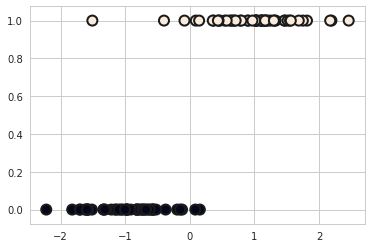

In [76]:
X, y = make_classification(n_features=1, n_informative=1, 
                           n_redundant=0, n_clusters_per_class=1, random_state=4)
plt.scatter(X, y, marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

독립 변수 2개 (서로 독립인 변수 1개)
- 가로축이 $X_1$, 세로축이 $X_2$

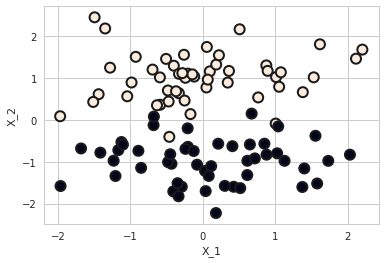

In [87]:
X, y = make_classification(n_features=2, n_informative=1, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=2, random_state=4)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

위 경우,  $y$ 값에 영향을 미치는 것은 $X_2$ 뿐이다. $X_1$은 의미없는 독립 변수

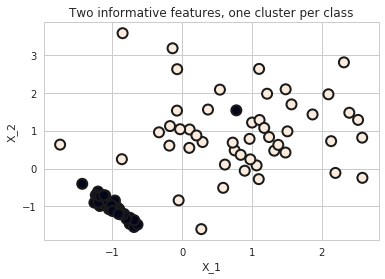

In [89]:
plt.title("Two informative features, one cluster per class")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

두 독립 변수 모두 y값에 영향을 미친다.

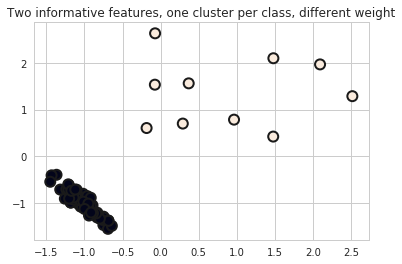

In [121]:
plt.title("Two informative features, one cluster per class, different weight")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.9, 0.1], random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

`weights=[0.9, 0.1]` 를 통해 클래스에 할당된 표본 수를 조절할 수 있다.
- ex) 희귀병 샘플

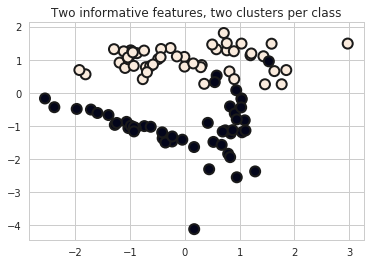

In [99]:
plt.title("Two informative features, two clusters per class")
X2, Y2 = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                             n_clusters_per_class=2, random_state=6)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

`n_clusters_per_class = 2` 클래스(종류) 당 클러스터(뭉치)의 수 
- 종속 변수 $y$의 클래스 하나당 클러스터가 2개인 경우. $(2 * 2 = 4)$

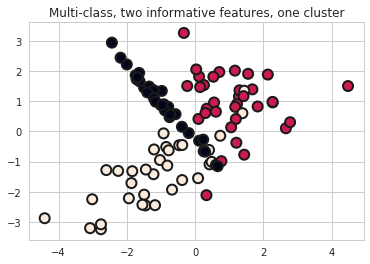

In [96]:
plt.title("Multi-class, two informative features, one cluster")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

`n_classes=3` 종속 변수의 클래스 수(종류)

In [101]:
from sklearn.datasets import make_blobs
# 디폴트 값
X, y = make_blobs(
    n_samples=100, # 표본 데이터
    n_features=2, # 독립 변수 수
    centers=3, # 생성할 클러스터의 수(혹은 중심)
    cluster_std=1.0,  # 클러스터의 표준 편차
    center_box=(-10.0, 10.0), # 생성할 클러스터의 바운딩 박스
    shuffle=True, random_state=None)

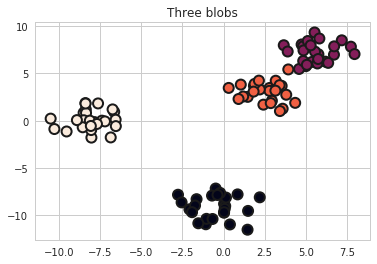

In [112]:
plt.title("Three blobs")
X1, Y1 = make_blobs(n_features=2, centers=4)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=100,
            edgecolor="k", linewidth=2)
plt.show()

기본적으로 @@가 1인 `make_classification`과 같다.

---

# 데이터 전처리

## Scaling

- `scale(X)`: 기본 스케일. 평균과 표준편차 사용
- `robust_scale(X)`: 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
- `minmax_scale(X)`: 최대/최소값이 각각 1, 0이 되도록 스케일링
- `maxabs_scale(X)`: 최대절대값과 0이 각각 1, 0이 되도록 스케일링

In [129]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

x = (np.arange(8, dtype=np.float) - 3).reshape(-1, 1)
x = np.vstack([x, [20]])  # outlier
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.872082,-1.00,0.000000,-0.15
1,-2.0,-0.718185,-0.75,0.043478,-0.10
2,-1.0,-0.564288,-0.50,0.086957,-0.05
3,0.0,-0.410391,-0.25,0.130435,0.00
4,1.0,-0.256495,0.00,0.173913,0.05
5,2.0,-0.102598,0.25,0.217391,0.10
6,3.0,0.051299,0.50,0.260870,0.15
7,4.0,0.205196,0.75,0.304348,0.20
8,20.0,2.667544,4.75,1.000000,1.00


In [130]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))

old mean: [5.84333333 3.054      3.75866667 1.19866667]
old std:  [0.82530129 0.43214658 1.75852918 0.76061262]
new mean: [-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
new std:  [1. 1. 1. 1.]


그러나 주로 **Scaler 클래스로 구현해야 함**
- why? test data 도 같은 기준으로 스케일링 해주어야 함!


1. 클래스 객체 생성
1. `fit()` 메서드와 트레이닝 데이터 사용하여 변환 계수 추정
1. `transform()` 메서드를 사용하여 실제 자료 변환 (for test data)

또는  `fit_transform()` 메서드로 2,3 동시 실행 (for train data)

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

data1.std(), data2.std()

(1.974000985027335, 1.0)

---

## Nomalization
개별 데이터의 크기는 모두 같게 만들기 위한 변환. 따라서 개별 데이터에 대해 서로 다른 변환 계수가 적용됨
- for what? 
    - 다차원 독립 변수 벡터가 있을 때, 각 벡터 원소들의 **상대적 크기만** 중요한 경우에 사용 
    - ex. 5개의 영화에 대한 평점을 줄 때, (1, 1, 2, 3, 1)이나 (2, 2, 4, 5, 2)나 같은 것으로 보기 위해서 normalization

In [131]:
from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5, dtype=float) - 20, np.arange(5, dtype=float) - 2]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normlize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
norms (scale)
 [2. 1. 0. 1. 2.]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]
norms (normalize)
 [1. 1. 1. 1. 1.]


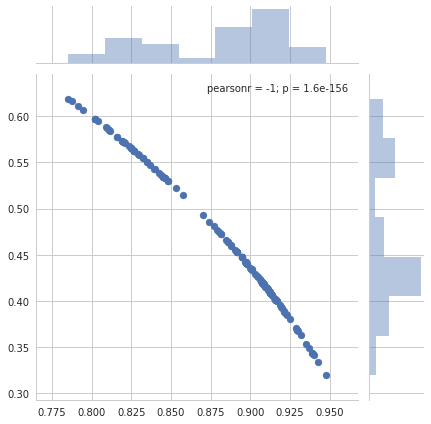

In [134]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data[:,:2]
data3 = normalize(data1)

sns.jointplot(data3[:,0], data3[:,1])
plt.show()

---

# Encoding
카테고리 값이나 텍스트 정보를 처리가 쉬운 정수로 변환

### One-Hot-Encoder

`fit`메서드를 호출하면 다음과 같은 속성 지정
- `n_values`: 최대 클래스 수
- `feature_indices_`: 입력이 벡터인 경우 각 원소를 나타내는 slice정보
- `active_featrues_`: 실제로 사용된 클래스들

In [135]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [158]:
X = np.array([[0], [1], [2]])
X

array([[0],
       [1],
       [2]])

In [159]:
ohe.fit(X)
print("최대 클래스 수 :", ohe.n_values_, "개")
print("입력이 벡터인 경우, 각 원소를 나타내는 slice정보 :", ohe.feature_indices_ ,"이 경우, 하나가 통으로")
print("실제 사용된 클래스들 :", ohe.active_features_)

최대 클래스 수 : [3] 개
입력이 벡터인 경우, 각 원소를 나타내는 slice정보 : [0 3] 이 경우, 하나가 통으로
실제 사용된 클래스들 : [0 1 2]


In [160]:
ohe.transform(X).toarray() # toarray를 통해 일반적 배열로 바꿈 / 원래는 sparse matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [161]:
X2 = np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2]]) 
X2

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]])

In [162]:
ohe.fit(X2)
print("최대 클래스 수 : 각", ohe.n_values_, "개")
print("입력이 벡터인 경우, 각 원소를 나타내는 slice정보 :", ohe.feature_indices_)
print("실제 사용된 클래스들 :", ohe.active_features_)

최대 클래스 수 : 각 [2 3 5] 개
입력이 벡터인 경우, 각 원소를 나타내는 slice정보 : [ 0  2  5 10]
실제 사용된 클래스들 : [0 1 2 3 4 5 6 7 9]


In [164]:
ohe.transform(X2).toarray() # toarray를 통해 일반적 배열로 바꿈 / 원래는 sparse matrix

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

### Imputer
누락된 정보를 채우는 변환

- `missing_values`: 누락 정보
- `strategy` : 채우는 방법. 디폴트는 `"mean"`
    - `"mean"`, `"median"`, `"most_freqent"`
    
>월마트 프로젝트의 경우? `상품 정보 누락`
- 위 세가지 방법으로 정보를 채우거나, 혹은 아예 다른 other로 만들어서 채울 수도 있을 듯
- 그러면 other들을 산 사람들을 판별할 때, 실제로는 다른 상품을 샀어도 같은 상품을 샀다고 오해할 가능성이 높아짐 -  그것은 위 세가지 방법도 마찬가지. 아예 빼는 것이 나은가? 하지만 실제로 **같은 상품**일수도 있다.

In [167]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform([[1, 2], [np.nan, 3], [7, 6]])

array([[1., 2.],
       [4., 3.],
       [7., 6.]])

### Binarizer

In [191]:
from sklearn.datasets import make_classification
%matplotlib inline

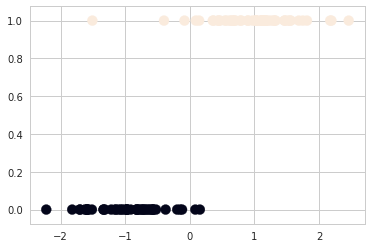

In [43]:
X, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                           n_clusters_per_class=1, random_state=4)
plt.scatter(X, y, marker='o', c=y, s=100)
plt.show()

x 값 0을 기준으로 나누면 5% 의 오차가 생김, x축 하나만으로는 저것이 최선

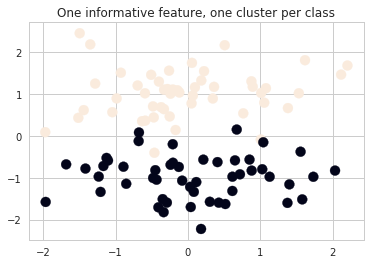

In [44]:
plt.title("One informative feature, one cluster per class")
X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
plt.show()

세로축만 영향을 미친다.

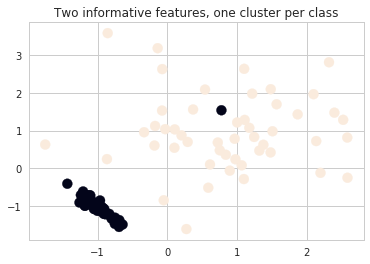

In [45]:
plt.title("Two informative features, one cluster per class")
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
plt.show()

두 축을 사용하여 구분 가능

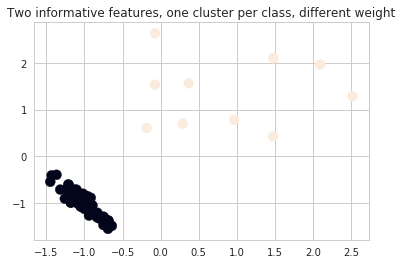

In [46]:
plt.title("Two informative features, one cluster per class, different weight")
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, weights=[0.9, 0.1], random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
plt.show()

weights를 통해 unbalanced data 생성 가능

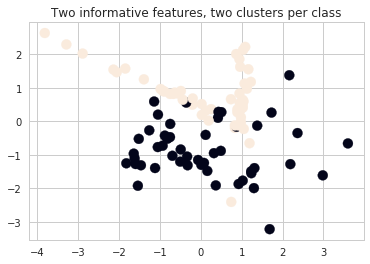

In [47]:
plt.title("Two informative features, two clusters per class")
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=100)
plt.show()

 n_classes= 2 (default)

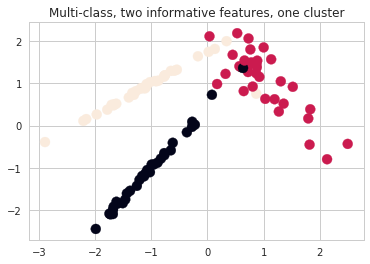

In [48]:
plt.title("Multi-class, two informative features, one cluster")
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
plt.show()

 n_classes=3

In [49]:
from sklearn.datasets import make_blobs

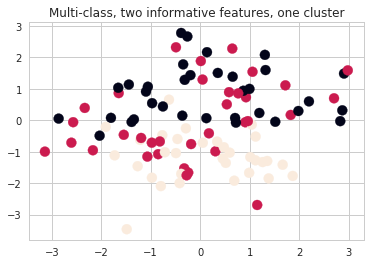

In [88]:
plt.title("Multi-class, two informative features, one cluster")
X, y = make_classification(n_features=3, n_redundant=0, n_informative=3,
                           n_clusters_per_class=2, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
plt.show()

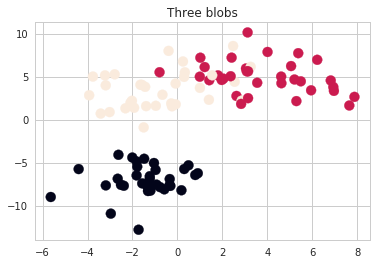

In [65]:
plt.title("Three blobs")
X1, Y1 = make_blobs(n_features=2, centers=3, cluster_std=2.0)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=100)
plt.show()

n_cluster_per_class(클래스 당 클러스터의 수)
가 1인 make 클러스터와 같다.

## 전처리

In [89]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

x = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1)
x = np.vstack([x, [20]])  # outlier
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.950995,-1.000000,0.000000,-0.15
1,-2.0,-0.789809,-0.777778,0.043478,-0.10
2,-1.0,-0.628624,-0.555556,0.086957,-0.05
3,0.0,-0.467438,-0.333333,0.130435,0.00
4,1.0,-0.306253,-0.111111,0.173913,0.05
5,2.0,-0.145067,0.111111,0.217391,0.10
6,3.0,0.016119,0.333333,0.260870,0.15
7,4.0,0.177304,0.555556,0.304348,0.20
8,5.0,0.338490,0.777778,0.347826,0.25
9,20.0,2.756273,4.111111,1.000000,1.00


In [90]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))

old mean: [5.84333333 3.054      3.75866667 1.19866667]
old std:  [0.82530129 0.43214658 1.75852918 0.76061262]
new mean: [-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
new std:  [1. 1. 1. 1.]


In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

data1.std(), data2.std()


(1.974000985027335, 1.0)

In [92]:
from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5, dtype=float) - 20, np.arange(5, dtype=float) - 2]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normlize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
norms (scale)
 [2. 1. 0. 1. 2.]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]
norms (normalize)
 [1. 1. 1. 1. 1.]


In [93]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data[:,:2]
data3 = normalize(data1)

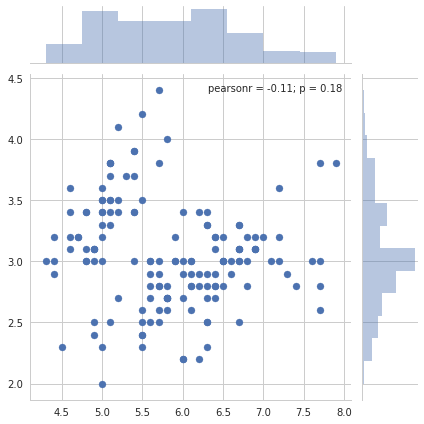

In [94]:
sns.jointplot(data1[:,0], data1[:,1])
plt.show()

노말라이즈

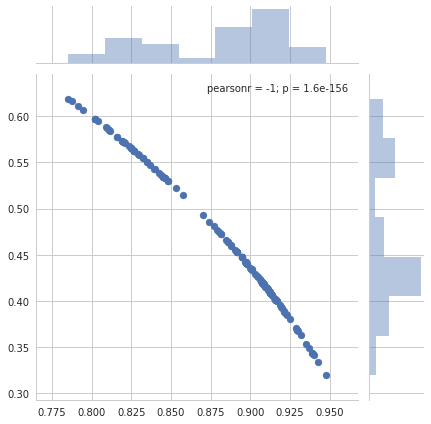

In [95]:
sns.jointplot(data3[:,0], data3[:,1])
plt.show()

ohe.n_values_, 

ohe.feature_indices_, 카테고리가 위치한 자리

ohe.active_features_ 

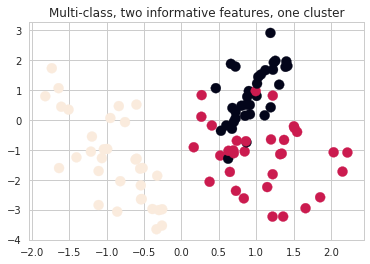

In [63]:
plt.title("Multi-class, two informative features, one cluster")
X, y = make_classification(n_features=3, n_redundant=0, n_informative=3,
                           n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
plt.show()

In [102]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [103]:
X = np.array([[0], [1], [2]])
X

array([[0],
       [1],
       [2]])

In [108]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([2, 3, 5]), array([ 0,  2,  5, 10]), array([0, 1, 2, 3, 4, 5, 6, 7, 9]))

In [109]:
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

---

In [114]:
X = np.array([[0, 0, 4], [1, 1, 3], [0, 2, 1], [1, 0, 2]]) 
X

array([[0, 0, 4],
       [1, 1, 3],
       [0, 2, 1],
       [1, 0, 2]])

In [115]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([2, 3, 5]), array([ 0,  2,  5, 10]), array([0, 1, 2, 3, 4, 6, 7, 8, 9]))

In [116]:
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0., 0.]])

In [111]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([2, 3, 5]), array([ 0,  2,  5, 10]), array([0, 1, 2, 3, 4, 5, 6, 7, 9]))

In [113]:
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

## QDA

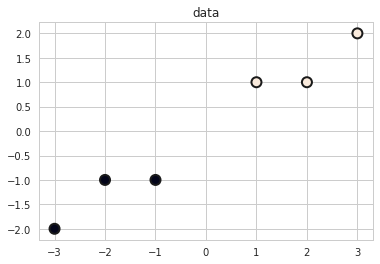

In [180]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.title("data")
plt.show()

In [181]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(X, y)

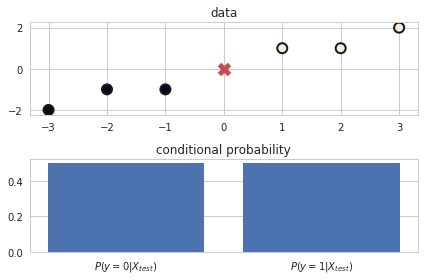

In [182]:
x = [[0, 0]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x[0][0], x[0][1], c='r', s=100, edgecolor='k', marker='x', linewidth=5)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.tight_layout()
plt.show()

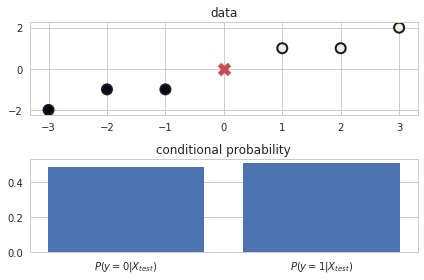

In [183]:
x = [[0.001, 0.005]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x[0][0], x[0][1], c='r', s=100, marker='x', edgecolor='k', linewidth=5)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.tight_layout()
plt.show()

In [186]:
x = [[0.001, 0.005],[0.001, 0.005],[0.001, 0.005],[0.001, 0.005],[0.001, 0.005],[0.001, 0.005]]

In [190]:
for i in range(10):
    print(model.predict(x))

[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]


x 가 0인경우, 0.5인 경우

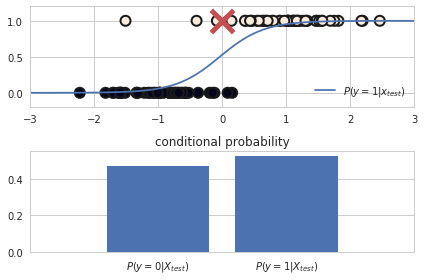

In [170]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

model = LogisticRegression().fit(X0, y) # 예측모델 생성

xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]
# prob = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X0, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(0, model.predict(0), marker='x', s=500, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(0)[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.title("conditional probability")
plt.tight_layout()
plt.show()

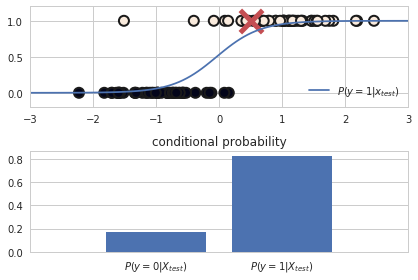

In [171]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

model = LogisticRegression().fit(X0, y) # 예측모델 생성

xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]
# prob = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X0, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(0.5, model.predict(0.5), marker='x', s=500, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(0.5)[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.title("conditional probability")
plt.tight_layout()
plt.show()